<a href="https://colab.research.google.com/github/xslittlemaggie/Deep-Learning-Projects/blob/master/MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import SGD, adam, RMSprop

from keras.utils import np_utils
from keras import backend as K

# visualization
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [0]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [15]:
print("The shape of x_train: {}".format(x_train.shape))
print("The shape of y_train: {}".format(y_train.shape))
print("The shape of x_test: {}".format(x_test.shape))
print("The shape of y_test: {}".format(y_test.shape))

The shape of x_train: (60000, 28, 28)
The shape of y_train: (60000,)
The shape of x_test: (10000, 28, 28)
The shape of y_test: (10000,)


## Data preprocessing

In [0]:
if K.image_data_format() == "channels_first":
  x_train = x_train.reshape(x_train.shape[0], 1, 28, 28)
  x_test = x_test.reshape(x_test.shape[0], 1, 28, 28)
  input_shape = (1, 28, 28)
else:
  x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
  x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
  input_shape = (28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255
x_test = x_test/255

# convert class vectors to binary class matrics
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [17]:
"""
nrows = 2
ncols = 5
plt.figure(figsize = (10, 4))
for i in range(10):
  print("The true label: {}".format(y_train[i]))
  plt.subplot(nrows, ncols, i + 1)  
  plt.imshow(x_train[i]) # cmap = "gray" 
  plt.axis("Off")
plt.show()
"""

'\nnrows = 2\nncols = 5\nplt.figure(figsize = (10, 4))\nfor i in range(10):\n  print("The true label: {}".format(y_train[i]))\n  plt.subplot(nrows, ncols, i + 1)  \n  plt.imshow(x_train[i]) # cmap = "gray" \n  plt.axis("Off")\nplt.show()\n'

## Data visualization

In [0]:
#data_one = y_train.where(y_train[y_train == 1])

In [19]:
# print the first 5 images from the training dataset
"""
for i in range(5):
  print("The true label: {}".format(y_train[i]))
  plt.axis("Off")
  plt.imshow(x_train[i]) # cmap = "gray"
  plt.show()
  print()
"""

'\nfor i in range(5):\n  print("The true label: {}".format(y_train[i]))\n  plt.axis("Off")\n  plt.imshow(x_train[i]) # cmap = "gray"\n  plt.show()\n  print()\n'

## Mdoel building

In [20]:
epochs = 20

# define CNN model
model = Sequential()

# 第一层 CNN， 总共有32 个3*3 的卷积核
model.add(Conv2D(32, kernel_size = (3, 3), input_shape = (28, 28, 1)))
model.add(Activation('relu'))

# 第二层 CNN
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.25))  # one solution for overfitting, dropout

 
# 第三层 CNN
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.25))  # one solution for overfitting, dropout

         
# 将图片拉平         
model.add(Flatten())

# 第四层 全连接          
model.add(Dense(128))
model.add(Activation('relu'))
# model.add(Dropout(0.5))

          
model.add(Dense(10, activation ='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer = adam(), metrics = ['accuracy'])

history = model.fit(x_train, y_train,
         batch_size = 128, 
         epochs = epochs,
         verbose = 1,
         validation_data = (x_test, y_test))

score = model.evaluate(x_train, y_train, verbose = 0) 
print("Train Acc:", score[1])

model.evaluate(x_test, y_test, verbose = 0) 

print("Test Acc:", score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 163us/step - loss: 0.1691 - acc: 0.9486 - val_loss: 0.0469 - val_acc: 0.9846
Epoch 2/20
60000/60000 [==============================] - 9s 154us/step - loss: 0.0446 - acc: 0.9861 - val_loss: 0.0292 - val_acc: 0.9901
Epoch 3/20
60000/60000 [==============================] - 9s 155us/step - loss: 0.0287 - acc: 0.9909 - val_loss: 0.0333 - val_acc: 0.9890
Epoch 4/20
60000/60000 [==============================] - 9s 154us/step - loss: 0.0213 - acc: 0.9931 - val_loss: 0.0260 - val_acc: 0.9916
Epoch 5/20
60000/60000 [==============================] - 9s 154us/step - loss: 0.0161 - acc: 0.9949 - val_loss: 0.0307 - val_acc: 0.9895
Epoch 6/20
60000/60000 [==============================] - 9s 153us/step - loss: 0.0136 - acc: 0.9957 - val_loss: 0.0247 - val_acc: 0.9930
Epoch 7/20
60000/60000 [==============================] - 9s 154us/step - loss: 0.0110 - acc: 0.9966 - val_loss: 0.0295 -

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_4 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
activation_5 (Activation)    (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
activation_6 (Activation)    (None, 10, 10, 64)       

## 提取CNN的各层输出，观察CNN的各层都学习到了什么

In [22]:
# 获取各层的输出
layer_outputs = [layer.output for layer in model.layers]
layer_outputs

[<tf.Tensor 'conv2d_3/BiasAdd:0' shape=(?, 26, 26, 32) dtype=float32>,
 <tf.Tensor 'activation_4/Relu:0' shape=(?, 26, 26, 32) dtype=float32>,
 <tf.Tensor 'conv2d_4/BiasAdd:0' shape=(?, 24, 24, 64) dtype=float32>,
 <tf.Tensor 'activation_5/Relu:0' shape=(?, 24, 24, 64) dtype=float32>,
 <tf.Tensor 'max_pooling2d_2/MaxPool:0' shape=(?, 12, 12, 64) dtype=float32>,
 <tf.Tensor 'conv2d_5/BiasAdd:0' shape=(?, 10, 10, 64) dtype=float32>,
 <tf.Tensor 'activation_6/Relu:0' shape=(?, 10, 10, 64) dtype=float32>,
 <tf.Tensor 'max_pooling2d_3/MaxPool:0' shape=(?, 5, 5, 64) dtype=float32>,
 <tf.Tensor 'flatten_2/Reshape:0' shape=(?, ?) dtype=float32>,
 <tf.Tensor 'dense_3/BiasAdd:0' shape=(?, 128) dtype=float32>,
 <tf.Tensor 'activation_7/Relu:0' shape=(?, 128) dtype=float32>,
 <tf.Tensor 'dense_4/Softmax:0' shape=(?, 10) dtype=float32>]

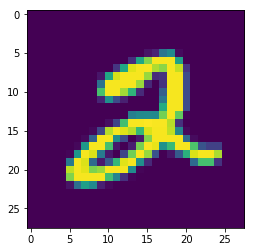

In [23]:
plt.imshow(x_train[5][:, :, 0])
plt.show()

In [24]:
# 获取各层的名称
layer_names = [layer.name for layer in model.layers]
layer_names 

['conv2d_3',
 'activation_4',
 'conv2d_4',
 'activation_5',
 'max_pooling2d_2',
 'conv2d_5',
 'activation_6',
 'max_pooling2d_3',
 'flatten_2',
 'dense_3',
 'activation_7',
 'dense_4']

In [0]:
from keras.models import Model

layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(x_train[5].reshape(1,28,28,1))
 
def display_activation(activations, col_size, row_size, act_index, figsize): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize= figsize)
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            ax[row][col].axis("Off")
            activation_index += 1

## visualization of the feature extraction layers

## 第一层:CNN_1（32 个卷积核， index = 0）

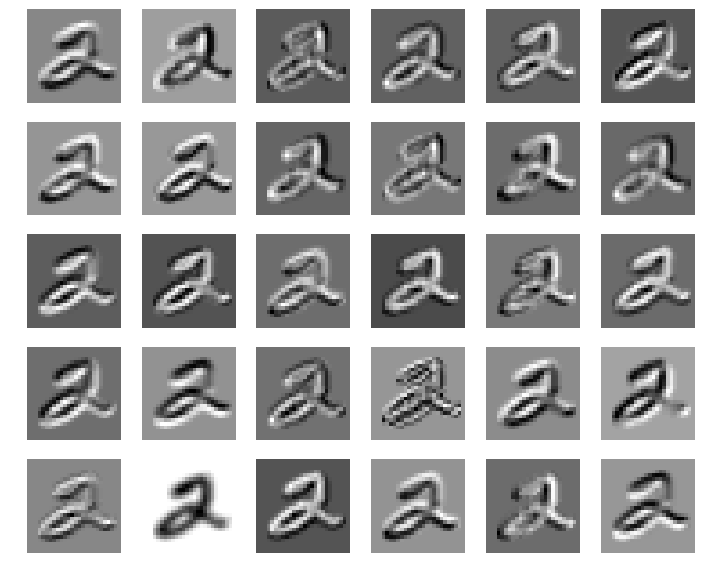

In [61]:
display_activation(activations, 6, 5, 0, figsize = (12, 10))

## 第二层：激活层 （还是32个卷积核）

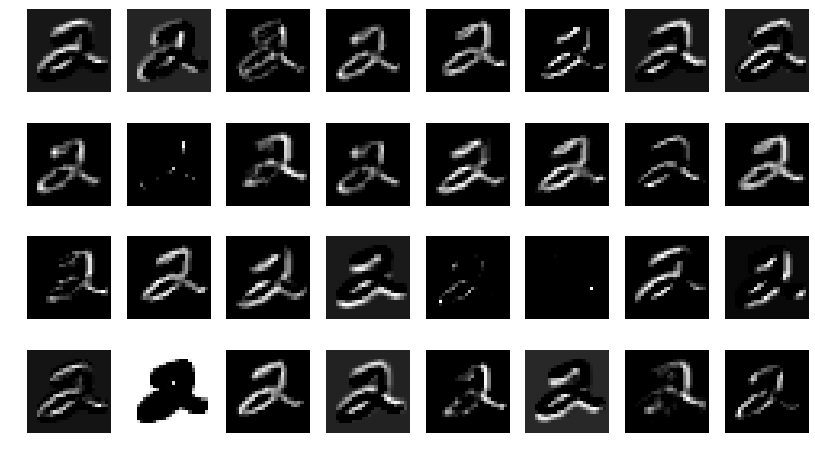

In [66]:
display_activation(activations, 8, 4, 1, figsize = (14, 8))

## 第三层:CNN_2（64 个卷积核， index = 2）

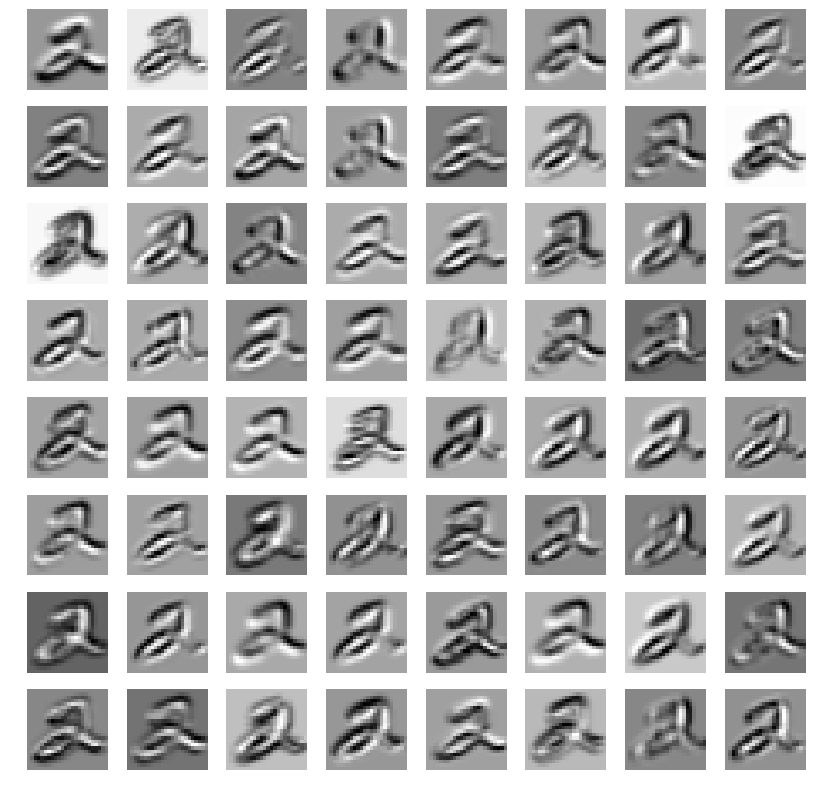

In [70]:
display_activation(activations, 8, 8, 2, figsize = (14, 14))

## 第四层:激活层（64 个卷积核， index = 3）

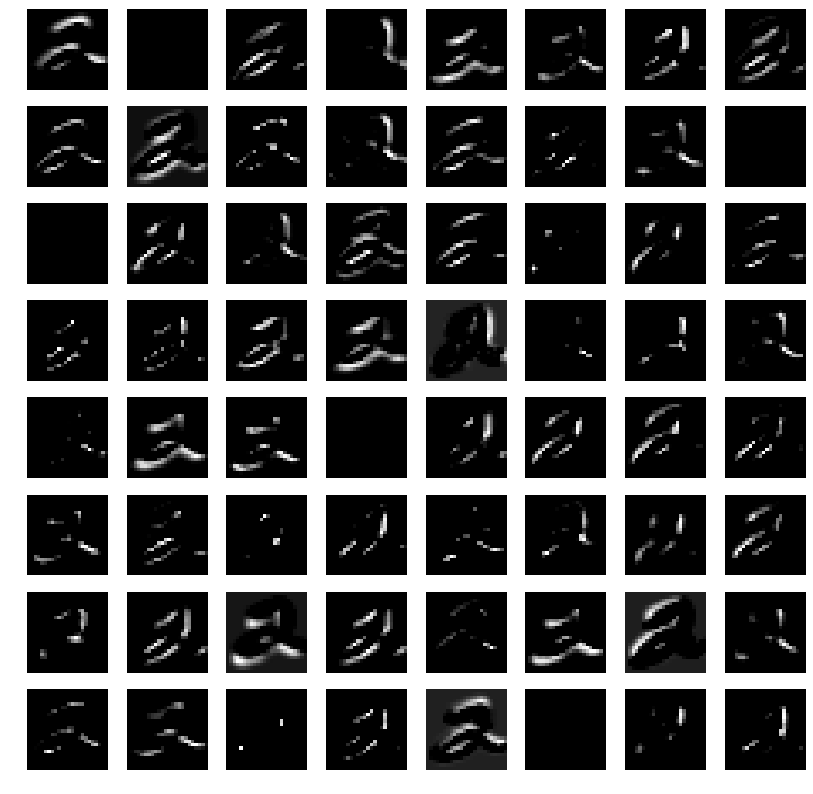

In [74]:
display_activation(activations, 8, 8, 3, figsize = (14, 14))

## 第五层:池化层（64 个卷积核， index = 4）

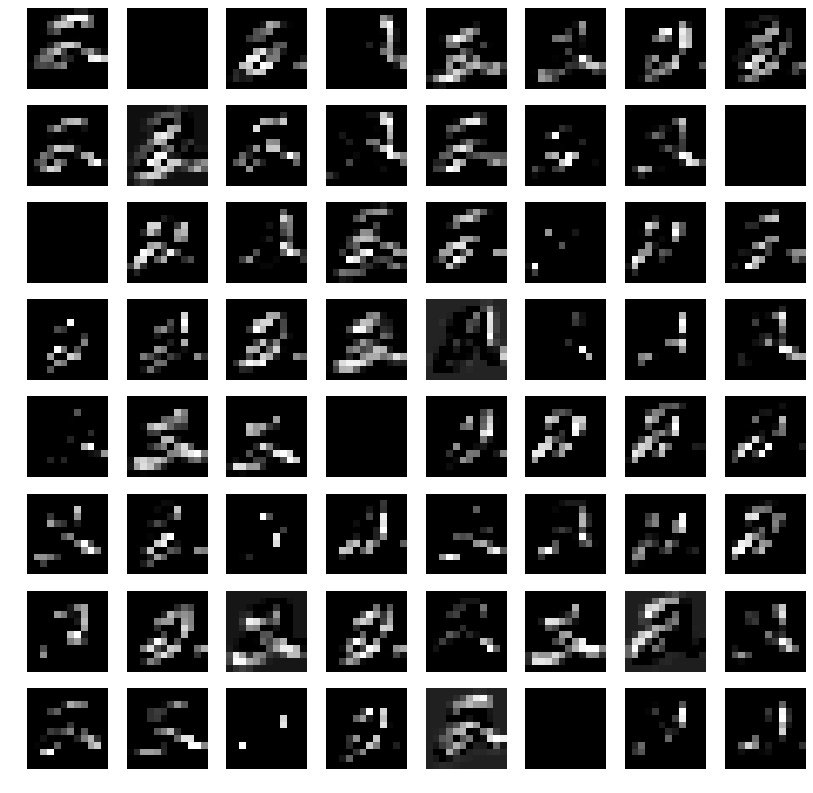

In [75]:
display_activation(activations, 8, 8, 4, figsize = (14, 14))

## 第六层: CNN_3（64 个卷积核， index = 5）

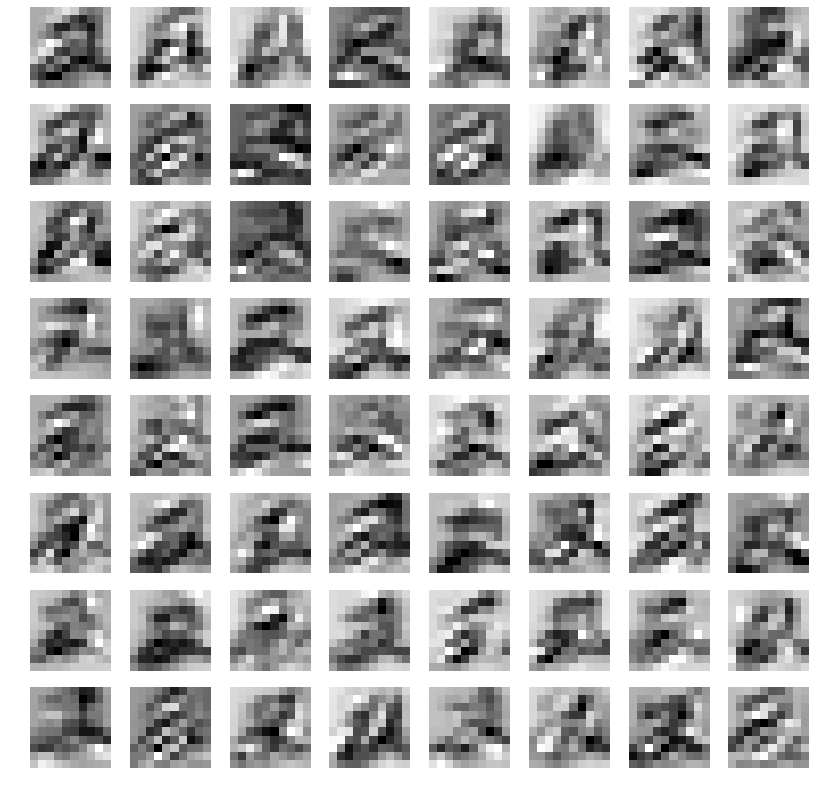

In [79]:
display_activation(activations, 8, 8, 5, figsize = (14, 14))

## 第七层: 激活层（64 个卷积核， index = 6）

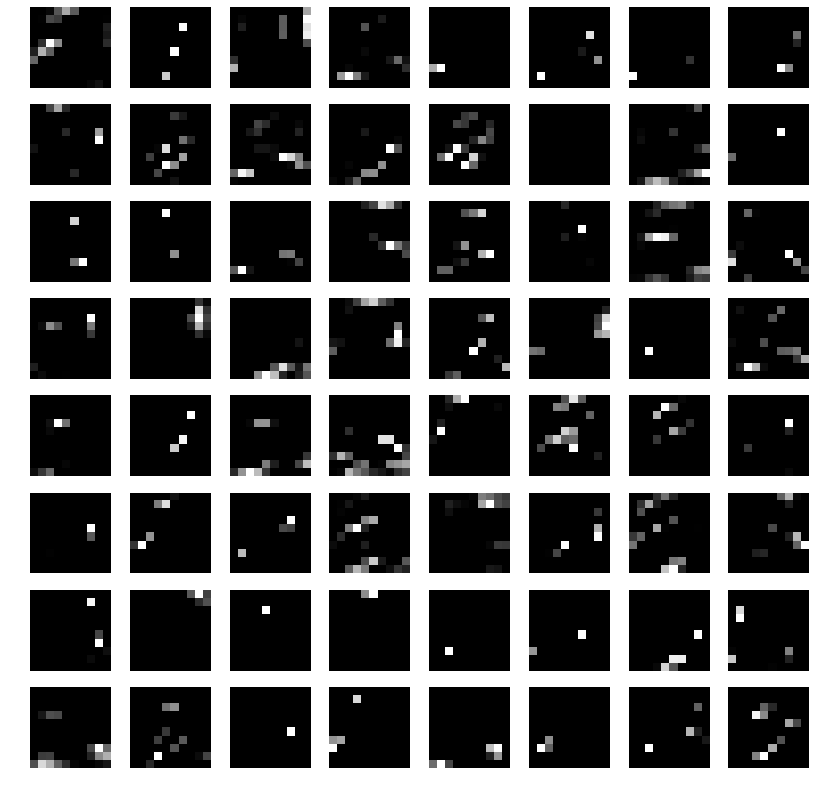

In [91]:
display_activation(activations, 8, 8, 6, figsize = (14, 14))

## 第八层：池化层（index = 7）

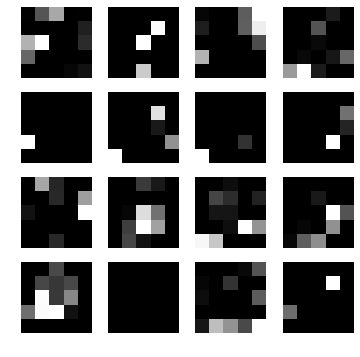

In [92]:
display_activation(activations, 4, 4, 7, figsize = (6, 6))

## 模型准确率评估

In [0]:
import numpy as np
print("The best validation accuracy score: {}%".format(max(history.history["val_acc"]) * 100))
plt.figure(figsize = (10, 6))
plt.plot(history.history["acc"], color = "r")
plt.plot(history.history["val_acc"], color = "g")
plt.xticks(np.arange(1, epochs + 1, 5))
plt.legend(["Training", "Validation" ])
plt.title("Training vs Validation Accuracy", size = 16)
plt.xlabel("Epochs", size = 14)
plt.ylabel("Accuracy", size = 14)
plt.savefig("Accuracy.png")
plt.show()

In [0]:
plt.figure(figsize = (10, 6))
plt.plot(history.history["loss"], color = "r")
plt.plot(history.history["val_loss"], color = "g")
plt.xticks(np.arange(1, epochs + 1, 5))
plt.legend(["Training", "Validation" ])
plt.title("Training vs Validation Loss", size = 16)
plt.xlabel("Epochs", size = 12)
plt.ylabel("Accuracy", size = 12)
plt.savefig("Loss.png")
plt.show()

### Reference:
URL_1 = "https://www.jiqizhixin.com/articles/2019-01-31-13"

URL_2 = ”https://blog.csdn.net/weiwei9363/article/details/79112872“ **feature visualization**